In [125]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt

In [90]:
metrics=pd.read_csv("./Original Data/Measurement_item_info.csv")

In [95]:
data=pd.read_csv("Measurement_summary.csv")
data.head()

Measurement date  Station code  \
0  2017-01-01 00:00           101   
1  2017-01-01 01:00           101   
2  2017-01-01 02:00           101   
3  2017-01-01 03:00           101   
4  2017-01-01 04:00           101   

                                             Address   Latitude   Longitude  \
0  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005007   
1  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005007   
2  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005007   
3  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005007   
4  19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005007   

     SO2    NO2     O3   CO  PM10  PM2.5  
0  0.004  0.059  0.002  1.2  73.0   57.0  
1  0.004  0.058  0.002  1.2  71.0   59.0  
2  0.004  0.056  0.002  1.2  70.0   59.0  
3  0.004  0.056  0.002  1.2  70.0   58.0  
4  0.003  0.051  0.002  1.2  69.0   61.0

Dropping the location data as sation code is enough to diffrenciate the location

In [96]:
print(data["Measurement date"].min(),data["Measurement date"].max())
data.set_index(pd.DatetimeIndex(data["Measurement date"]).to_series(),inplace=True)
data.index
data.drop(columns=["Latitude","Longitude","Address","Measurement date"],inplace=True)

2017-01-01 00:00 2019-12-31 23:00


In [97]:
data["Station code"].nunique(),data["Station code"].unique(),data["Station code"].value_counts(),

(25,
 array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
        114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125],
       dtype=int64),
 110    25906
 116    25906
 101    25905
 124    25905
 102    25905
 122    25905
 121    25905
 106    25905
 111    25905
 114    25905
 103    25904
 109    25904
 125    25904
 115    25904
 118    25904
 123    25904
 104    25896
 108    25894
 119    25894
 120    25894
 112    25892
 117    25892
 113    25892
 107    25891
 105    25890
 Name: Station code, dtype: int64)

# Data is collectied from 25 diffrent location in seoul city for 2 year from 2017-2019 measured every 1hr of SO2	NO2	O3	CO	PM10	PM2.5

In [108]:
data101=data[data["Station code"]==101].drop(columns=["Station code"])
data101

SO2    NO2     O3   CO  PM10  PM2.5
Measurement date                                          
2017-01-01 00:00:00  0.004  0.059  0.002  1.2  73.0   57.0
2017-01-01 01:00:00  0.004  0.058  0.002  1.2  71.0   59.0
2017-01-01 02:00:00  0.004  0.056  0.002  1.2  70.0   59.0
2017-01-01 03:00:00  0.004  0.056  0.002  1.2  70.0   58.0
2017-01-01 04:00:00  0.003  0.051  0.002  1.2  69.0   61.0
...                    ...    ...    ...  ...   ...    ...
2019-12-31 19:00:00  0.003  0.026  0.014  0.5  26.0   19.0
2019-12-31 20:00:00  0.003  0.024  0.014  0.4  27.0   19.0
2019-12-31 21:00:00  0.003  0.014  0.021  0.4  23.0   18.0
2019-12-31 22:00:00  0.003  0.022  0.014  0.5  20.0   19.0
2019-12-31 23:00:00  0.004  0.035  0.005  0.5  20.0   15.0

[25905 rows x 6 columns]

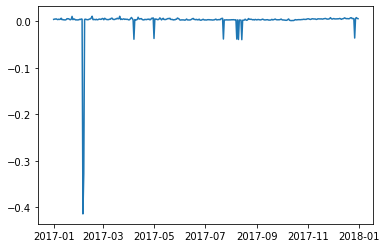

In [140]:
sdata101=data101.resample("D").mean()
sdata101["2017"].index

plt.plot(sdata101["2017"].index,sdata101["2017"].SO2)

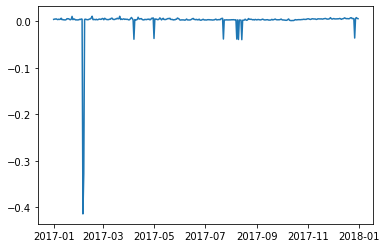

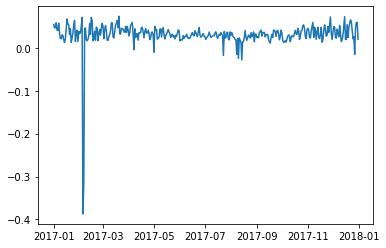

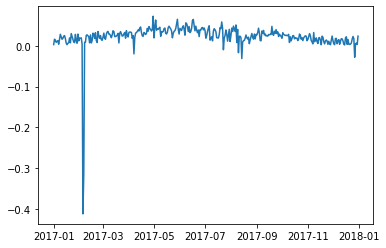

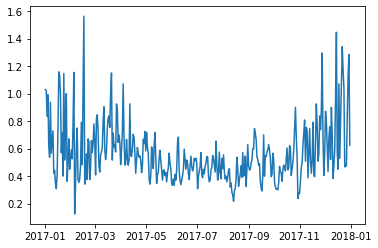

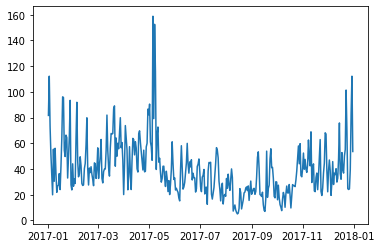

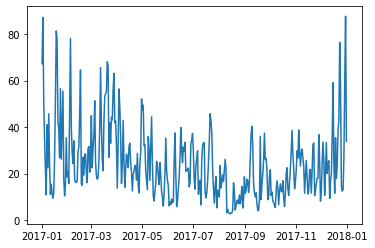

In [149]:
for key in sdata201["2017"].keys():
    plt.plot(sdata101["2017"].index,sdata101["2017"][key])
    plt.show()

In [159]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(sdata101.SO2, model='additive')
fig = decomposition.plot()
plt.show()


ValueError: This function does not handle missing values

In [ ]:
SO2